In [1]:
import pickle
import shap
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [2]:
model_path = "../outputs/logistic_regression_high_poverty.pkl"
model = joblib.load(model_path)

In [3]:
train_path = "../outputs/train_df.csv"
test_path = "../outputs/test_df.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
X_train = train_df.drop(columns=["fully_funded", "date_posted"])
y_train = train_df["fully_funded"]

X_test = test_df.drop(columns=["fully_funded", "date_posted"])
y_test = test_df["fully_funded"]

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((389743, 132), (114037, 133), (389743,), (114037,))

In [6]:
set(X_train.columns) - set(X_test.columns)
set(X_test.columns) - set(X_train.columns)
X_test = X_test[X_train.columns]

In [7]:
X_train.shape, X_test.shape

((389743, 132), (114037, 132))

In [12]:
expected_features = model.feature_names_in_
extra_features = set(X_train.columns) - set(expected_features)
print("Extra features:", extra_features)

Extra features: set()


In [13]:
X_train = X_train[expected_features]
X_test = X_test[expected_features]

In [14]:
X_train.shape, X_test.shape

((389743, 130), (114037, 130))

In [15]:
background = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(model.predict_proba, background)
X_test_sample = X_test.sample(n=20, random_state=2024) 
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/20 [00:00<?, ?it/s]

In [16]:
shap_values[0], shap_values[1]

(array([[ 0.00000000e+00,  2.94673261e-03, -1.15629741e-02, ...,
          1.94306820e-02,  1.61213920e-02, -7.28755370e-01],
        [-1.64900047e-03, -2.37717876e-03, -2.57971601e-03, ...,
          1.39557124e-02, -7.61567221e-02,  3.18060668e-02],
        [ 1.99519758e-03, -5.18458951e-03,  8.70761298e-03, ...,
          1.90574848e-02,  2.61140295e-02, -6.63221065e-01],
        ...,
        [ 0.00000000e+00,  1.66669325e-03, -6.58745446e-03, ...,
          1.88423374e-02,  2.04628815e-02,  3.01873159e-02],
        [-3.45008568e-03,  4.87909491e-04,  2.70482267e-03, ...,
          3.23301962e-02,  3.10653347e-02,  2.64926123e-02],
        [-3.01977553e-03, -3.43853265e-03,  1.26902946e-02, ...,
          2.59002583e-02,  1.83317899e-02, -6.28581540e-01]]),
 array([[ 0.00000000e+00, -2.94673261e-03,  1.15629741e-02, ...,
         -1.94306820e-02, -1.61213920e-02,  7.28755370e-01],
        [ 1.64900047e-03,  2.37717876e-03,  2.57971601e-03, ...,
         -1.39557124e-02,  7.61567221e

In [17]:
model.classes_

array([0., 1.])

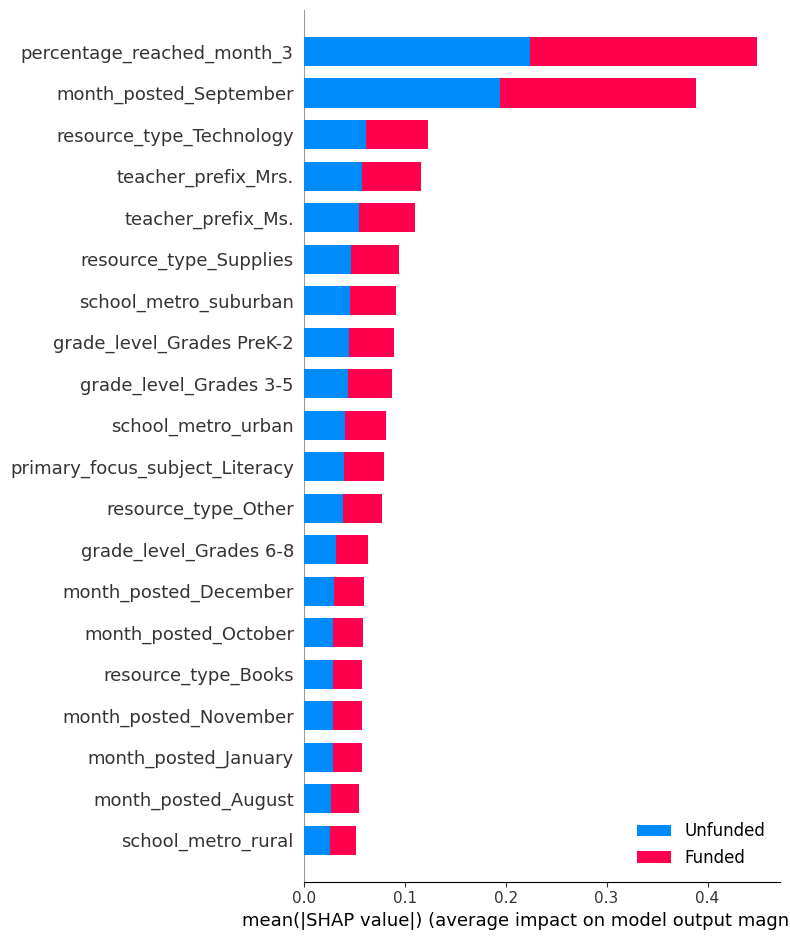

<Figure size 640x480 with 0 Axes>

In [18]:
class_names = ["Unfunded", "Funded"]
shap.summary_plot(shap_values, X_test_sample, class_names=class_names)
plt.savefig("../outputs/summary_plot_lr_high.png", bbox_inches="tight")

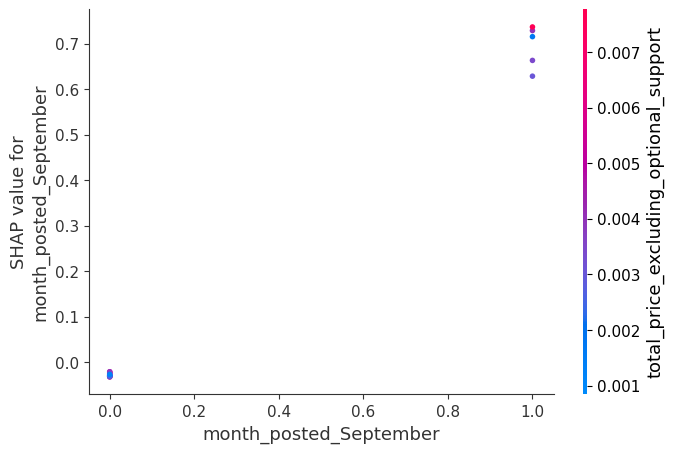

In [19]:
shap.dependence_plot("month_posted_September", shap_values[1], X_test_sample)

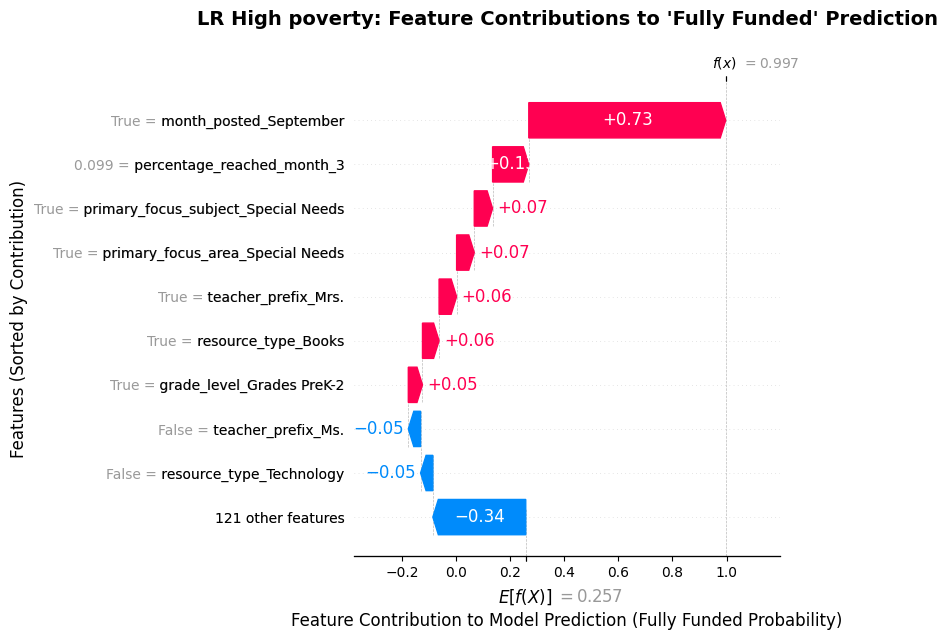

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title(
    "LR High poverty: Feature Contributions to 'Fully Funded' Prediction\n",
    fontsize=14, fontweight="bold"
)

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[1][0, :], 
        base_values=explainer.expected_value[1],  
        data=X_test_sample.iloc[0, :],
        feature_names=X_test_sample.columns 
    ),
    show=False
)

ax.set_xlabel("Feature Contribution to Model Prediction (Fully Funded Probability)", fontsize=12, labelpad=23)
ax.set_ylabel("Features (Sorted by Contribution)", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.xticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()
